<a href="https://colab.research.google.com/github/nilesh0109/ML_SoSe19/blob/master/ML_ex06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE GAUSSIAN

In [27]:
np.random.seed(2)
data_points_to_draw = 100
mu, sigma, data_points = [-2, -7, 10], [3, 0.9, 2], []
for i in range(3):
  normal_data_points = np.random.normal(mu[i], sigma[i], (data_points_to_draw,1))
  if i ==2:
    data_points.append(normal_data_points[:50])
  else:
    data_points.append(normal_data_points)
print(mu, sigma)
#print(data_points)

[-2, -7, 10] [3, 0.9, 2]


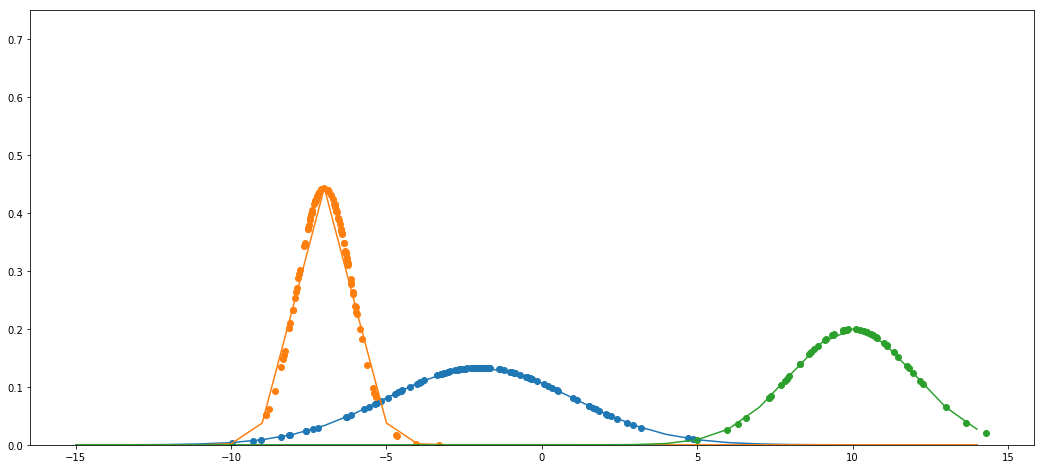

In [28]:
def getGaussian_pdf(pos, mu, sigma):
  temp = -0.5 * ((pos - mu) / sigma) ** 2
  return np.exp(temp) / (sigma * np.sqrt(2 * np.pi))

_,ax = plt.subplots(1,1, figsize=(18, 8))
for i in range(3):
  y=getGaussian_pdf(np.arange(-15,15), mu[i], sigma[i])
  ax.plot(np.arange(-15,15), y)
  ax.scatter(data_points[i], getGaussian_pdf(data_points[i], mu[i], sigma[i]))
ax.set_ylim(0,0.75)
plt.show()

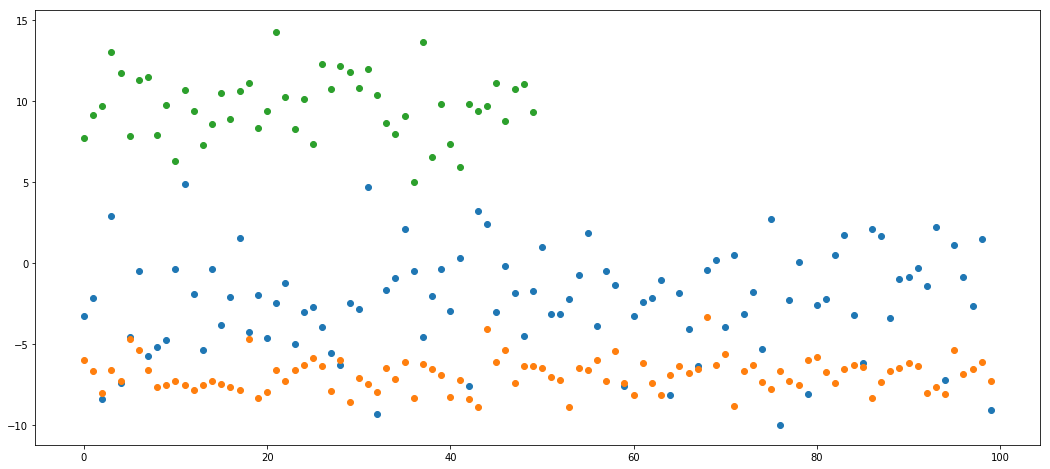

In [31]:
_,ax = plt.subplots(1,1, figsize=(18, 8))
for dataset in data_points:
  ax.scatter(np.arange(len(dataset)),dataset)
plt.show()

In [0]:
test_data_points = np.concatenate((data_points[0], data_points[1], data_points[2]), axis=None)

# EXPECTATION_MAXIMIZATION

In [0]:
'''

GMM Class with parameters as k weights(alpha), k mean(mu),k covarinace(sigma)
'''
class GMM:
  def __init__(self, num_gaussians, num_iterations):
    self.datapoints = data_points
    self.num_gaussians = num_gaussians
    self.num_iterations = num_iterations
    
    
  def Expectation_step(self):
    NUM_DATAPOINTS, NUM_GAUSSIANS = self.r.shape
    #calculate respossibility matrix r_ik
    for i in range(NUM_DATAPOINTS):
      for k in range(NUM_GAUSSIANS):
        self.r[i,k] =self.alpha[k] * getGaussian_pdf(self.datapoints[i], self.mu[k], self.sigma[k])
      self.r[i,:] /= self.r[i,:].sum()
        
  def Minimiztion_step(self):
    n_k = self.r.sum(axis=0)
    self.alpha = n_k / self.datapoints.shape[0]
    mu_temp = self.r * self.datapoints[:, np.newaxis]
    self.mu = mu_temp.sum(axis=0) / n_k
    sigma_temp = self.r * (np.column_stack((self.datapoints, self.datapoints, self.datapoints)) - self.mu) ** 2
    self.sigma = np.sqrt(sigma_temp.sum(axis=0) / n_k)
    
  def fit(self, data_points):
    np.random.seed(2)
    self.num_datapoints = len(data_points)
    self.datapoints = data_points
    
    self.r = np.zeros((self.num_datapoints, self.num_gaussians))
    self.alpha = [1/ self.num_gaussians] *  self.num_gaussians
    random_mu_index = np.random.choice(self.num_datapoints, self.num_gaussians, replace=False)
    self.mu = self.datapoints[random_mu_index]
    self.sigma = [np.std(self.datapoints)] * self.num_gaussians
    
    print('initial values are', self.alpha)
    print(self.mu, self.sigma)
    
    for i in range(self.num_iterations):
      self.Expectation_step()
      self.Minimiztion_step()
    

In [35]:
model = GMM(3, 1000)

model.fit(test_data_points)
print('final values are')
print(model.alpha)
print(model.mu)
print(model.sigma)

initial values are [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
[-0.94733452 -0.30117368  2.22008872] [6.4741187253625885, 6.4741187253625885, 6.4741187253625885]
final values are
[0.40790802 0.39221608 0.1998759 ]
[-7.04433975 -2.04315849  9.68734359]
[0.95731549 2.83311368 1.97376446]


# MULTIVARIATE GAUSSIAN DISTRIBUTION

(40, 50)
(50,)


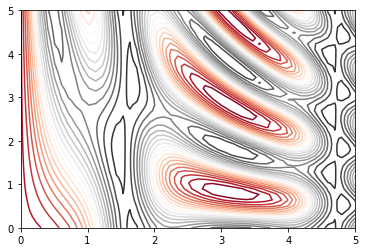

In [0]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
  
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
print(np.shape(X))
print(np.shape(x))
#print(Y)
#Z = f(X, Y)
Z = getGaussian_pdf(X, Y)
plt.contour(X, Y, Z, 20, cmap='RdGy')

(60, 60, 2)
(60, 60)
(60, 60, 2)
(60, 60)


/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'zdir', 'offset'
  s)


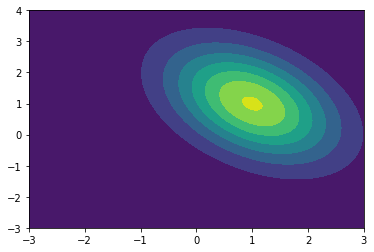

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([1., 1.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
print(pos.shape)
pos[:, :, 0] = X
pos[:, :, 1] = Y
print(X.shape)
print(pos.shape)
def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)
print(np.shape(Z))
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
#ax = fig.gca(projection='3d')
#ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.viridis)

cset = plt.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
#ax.set_zlim(-0.15,0.2)
#ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()